In [2]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [20]:
dataset_path = 'leapGestRecog'
subjects = os.listdir(dataset_path)

In [21]:
print("Subjects:", subjects)

Subjects: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [22]:
sample_size = 1000  
data = []
labels = []

Loading images and resizing them

In [23]:
gesture_labels = []

for subject in subjects:
    subject_path = os.path.join(dataset_path, subject)
    if os.path.isdir(subject_path):
        gestures = os.listdir(subject_path)
        for gesture in gestures:
            gesture_path = os.path.join(subject_path, gesture)
            if os.path.isdir(gesture_path):
                class_num = gesture_labels.index(gesture) if gesture in gesture_labels else len(gesture_labels)
                if gesture not in gesture_labels:
                    gesture_labels.append(gesture)
                count = 0  # Counter to keep track of the number of images loaded
                for img in os.listdir(gesture_path):
                    if count >= sample_size // (len(subjects) * len(gestures)):
                        break
                    try:
                        img_array = cv2.imread(os.path.join(gesture_path, img))
                        if img_array is not None:
                            resized_array = cv2.resize(img_array, (64, 64))  # Resize images to 64x64
                            data.append(resized_array)
                            labels.append(class_num)
                            count += 1
                    except Exception as e:
                        print(f"Error loading image {img}: {e}")

In [24]:
# Converting data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [25]:
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (1000, 64, 64, 3)
Labels shape: (1000,)


Normalizing pixel values

In [26]:
data = data / 255.0

Encoding Labels

In [27]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [28]:
#Spliting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Designing a simple Convolutional Neural Network (CNN) using Keras.

In [ ]:
%pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/46/43/03fa53f027e78af4a6bee3564d05cb34d9f5b924dc69c85f8ef5cb950ff1/keras-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/84/ef/979f256973dbc9f2c6432ae5f338aa06ee9e96e77a80898533b7f4253b58/optree-0.12.0-cp311-cp311-win_amd64.whl.metadata
     -----

In [33]:
%pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/package

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Arupa\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\Arupa\anaconda3\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Arupa\anaconda3\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "c:\Users\Arupa\anaconda3\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "c:\Users\Arupa\anaconda3\Lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtainin

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Defining the CNN model

In [35]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gesture_labels), activation='softmax')
])

c:\Users\Arupa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the CNN model on the sample dataset

In [38]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9922 - loss: 0.0330 - val_accuracy: 0.9937 - val_loss: 0.0343
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9885 - loss: 0.0325 - val_accuracy: 0.9937 - val_loss: 0.0184
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9912 - loss: 0.0238 - val_accuracy: 0.9937 - val_loss: 0.0305
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9937 - val_loss: 0.0311
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9916 - loss: 0.0604 - val_accuracy: 0.9937 - val_loss: 0.0387
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9943 - loss: 0.0274 - val_accuracy: 0.9937 - val_loss: 0.0182
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9939 - loss: 0.0309 - val_accuracy: 0.9937 - val_loss: 0.0397
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9941 - loss: 0.0277 - val_accuracy: 0.9937 - 

Model Evaluation

In [39]:
val_loss, val_acc = model.evaluate(X_val, y_val)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_acc}")
print(f"Test Accuracy: {test_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9949 - loss: 0.0211   
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9973 - loss: 0.0100
Validation Accuracy: 0.9937499761581421
Test Accuracy: 0.9950000047683716


Plotting training history

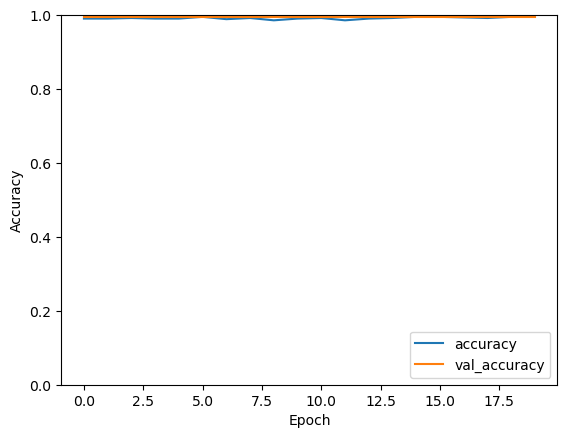

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [44]:
# Saving the model
model.save('my_model.keras')